<a href="https://colab.research.google.com/github/asoemardy/adhi-mating_ASL/blob/main/brainbraintwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The data

The dataset contains images with 29 different signs in American Sign Language. These are the 26 letters (A through Z) plus the signs for *space*, *delete* and *nothing*. Our model will view these images and learn to classify what sign is made in each image.

Sample images below


In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/asoemardy/adhi-mating_ASL.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 87405 (delta 0), reused 1 (delta 0), pack-reused 87403
Receiving objects: 100% (87405/87405), 1.14 GiB | 22.59 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Checking out files: 100% (87266/87266), done.
/content/cloned-repo
'American Sign Language Test Files'  'kaggle files'  'Test AM'
 brainbrain.ipynb		      README.md
 brainbraintwo.ipynb		      Resources


Samples images for letter A


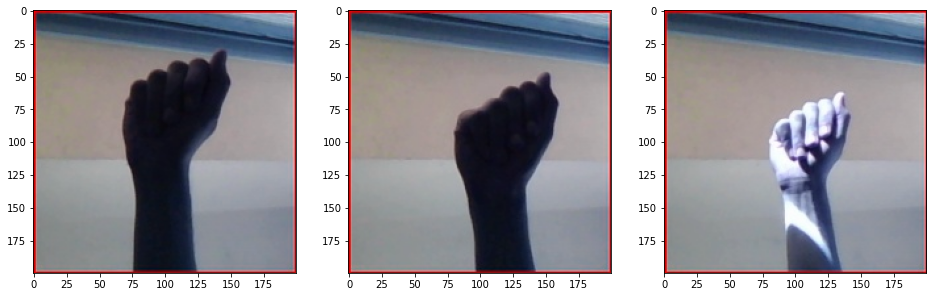

In [2]:
# Imports for Deep Learning
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
from numpy.random import seed
import numpy as np
seed(1)
import tensorflow
tensorflow.random.set_seed(2)


# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random

def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = 'Resources/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

plot_three_samples('A')

In [326]:
base_path = 'Resources/asl_alphabet_train/asl_alphabet_train/'
img_path = base_path + 'A' + '/**'
path_contents = glob(img_path)
randomimage = random.sample(path_contents, 1)

image_vec2 = cv2.imread(randomimage[0])
image_vec = cv2.imread('/content/E_0176.jpg')
g_blurred = cv2.GaussianBlur(image_vec, (5, 5), 0)


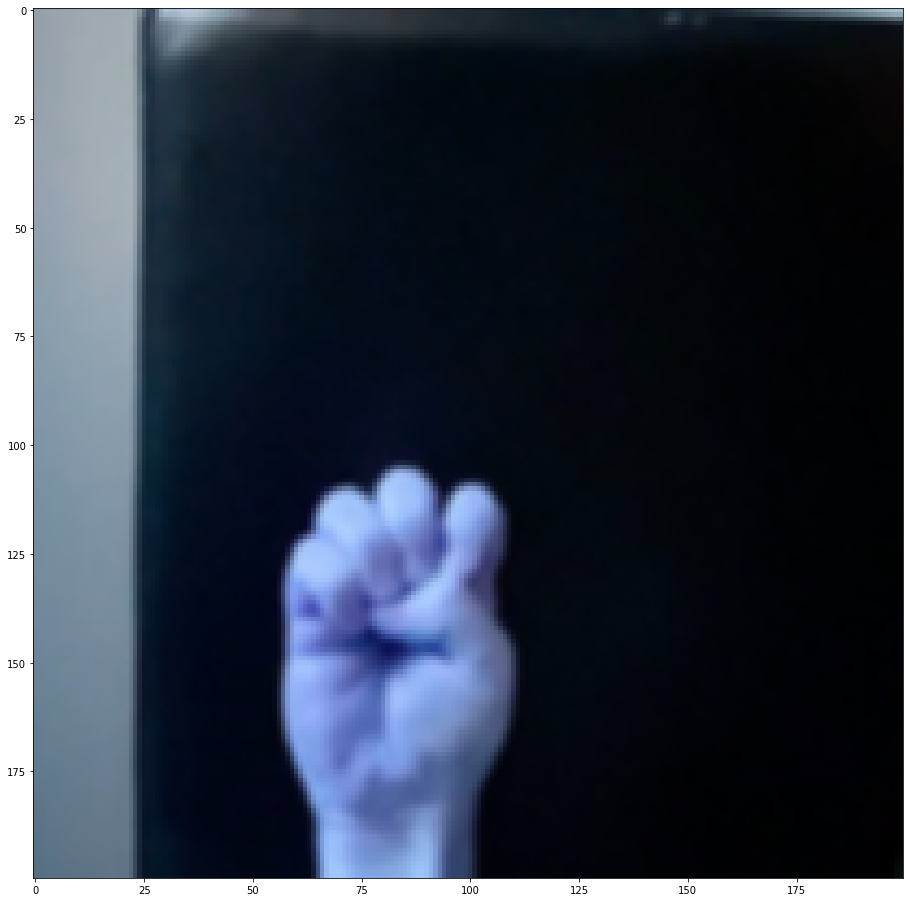

In [327]:
plt.figure(figsize=(16,16))
plt.imshow(g_blurred)

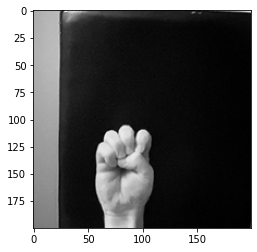

In [328]:
gray = cv2.cvtColor(image_vec, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

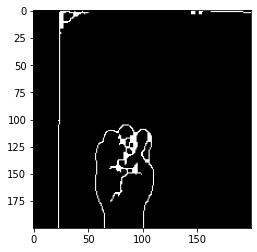

In [329]:
edges = cv2.Canny(gray, threshold1=100, threshold2=500)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)
plt.imshow(edges, cmap='gray')
plt.show()

In [152]:
edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255, 255, 255],
       ...,
       [  0,   0, 255, ...,   0, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255]], dtype=uint8)

In [321]:
# get the contours and their areas
contour_info = [(c, cv2.contourArea(c),) for c in cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[0]]

In [330]:
im = image_vec
contours,hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#im2 = cv2.drawContours(im, contours, -1, (0,0,0), 3)
mask = np.zeros(edges.shape, dtype=np.uint8)
mask = cv2.fillConvexPoly(mask, contours[0],(255))
# use dilate, erode, and blur to smooth out the mask
mask = cv2.dilate(mask, None, iterations=10)
mask = cv2.erode(mask, None, iterations=10)
mask = cv2.GaussianBlur(mask, (11, 11), 0)
cv2.imwrite('mask.jpg',mask)


True

In [331]:
mask_stack = cv2.imread('mask.jpg')
mask_stack.shape

(200, 200, 3)

In [332]:
# Ensures data types match up
mask_stack = mask_stack.astype('float32') / 255.0           
frame = im.astype('float32') / 255.0

(120000,)

In [333]:
# Blend the image and the mask
mask_color = (0.0,0.0,0.0)
masked = (mask_stack * frame ) + ((1-mask_stack) * mask_color)
masked = (masked * 255).astype('uint8')
#cv2.imshow("Foreground", masked)
cv2.imwrite('masked.jpg', masked)

True

In [64]:
def findSignificantContour(edgeImg):
    contours, hierarchy = cv2.findContours(
        edgeImg,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE
    )
        # Find level 1 contours
    level1Meta = []
    for contourIndex, tupl in enumerate(hierarchy[0]):
        # Filter the ones without parent
        if tupl[3] == -1:
            tupl = np.insert(tupl.copy(), 0, [contourIndex])
            level1Meta.append(tupl)
# From among them, find the contours with large surface area.
    contoursWithArea = []
    for tupl in level1Meta:
        contourIndex = tupl[0]
        contour = contours[contourIndex]
        area = cv2.contourArea(contour)
        contoursWithArea.append([contour, area, contourIndex])
    contoursWithArea.sort(key=lambda meta: meta[1], reverse=True)
    largestContour = contoursWithArea[0][0]
    return largestContour
contour = findSignificantContour(edges)
# Draw the contour on the original image
contourImg = np.copy(image_vec)
cv2.drawContours(contourImg, [contour], 0, (0, 255, 0), 2, cv2.LINE_AA, maxLevel=1)
plt.imshow(contourImg)
plt.show()

TypeError: ignored

Samples images for letter B


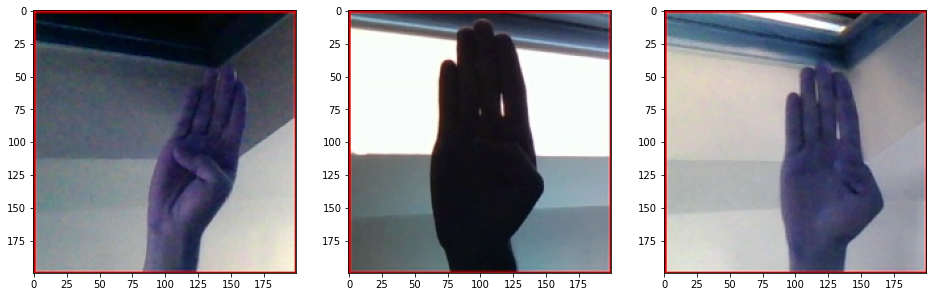

In [ ]:
plot_three_samples('B')

# Data Processing Set-Up

In [ ]:
data_dir = 'Resources/asl_alphabet_train/asl_alphabet_train/'
target_size = (64, 64)
target_dims = (64, 64, 3) # add channel for RGB
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [ ]:
label_map = (train_generator.class_indices)

# Model Specification

In [ ]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(n_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# Model Fitting

In [ ]:
my_model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
1224/1224 [==============================] - 104s 84ms/step - loss: 2.1490 - accuracy: 0.3600 - val_loss: 0.6143 - val_accuracy: 0.7900
Epoch 2/5
1224/1224 [==============================] - 103s 84ms/step - loss: 0.3259 - accuracy: 0.8900 - val_loss: 0.4679 - val_accuracy: 0.8515
Epoch 3/5
1224/1224 [==============================] - 103s 84ms/step - loss: 0.1924 - accuracy: 0.9353 - val_loss: 0.4643 - val_accuracy: 0.8522
Epoch 4/5
1224/1224 [==============================] - 103s 84ms/step - loss: 0.1446 - accuracy: 0.9516 - val_loss: 0.3782 - val_accuracy: 0.8763
Epoch 5/5
1224/1224 [==============================] - 103s 84ms/step - loss: 0.1307 - accuracy: 0.9567 - val_loss: 0.4249 - val_accuracy: 0.8779


In [ ]:
my_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 61, 61, 64)        3136      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 29, 29, 64)        65600     
_________________________________________________________________
dropout_15 (Dropout)         (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 128)       131200    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 9, 9, 256)        

In [ ]:
letter = 'A_test.jpg'
base_path = 'Resources/asl_alphabet_test/asl_alphabet_test/'
img_path = base_path + letter 
path_contents = glob(img_path)
target_size = (64, 64)
print(img_path)
from PIL import Image


import numpy as np
from keras.preprocessing import image


img = image.load_img('Resources/asl_alphabet_test/asl_alphabet_test/C_test.jpg', target_size = target_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)


Resources/asl_alphabet_test/asl_alphabet_test/A_test.jpg


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


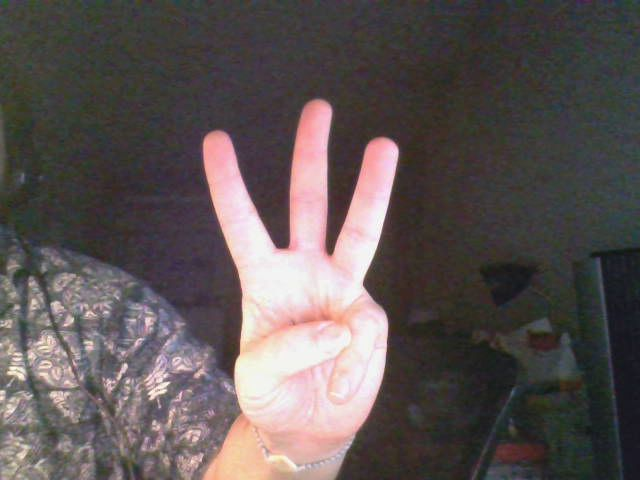

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
filepath = '/content/cloned-repo/American Sign Language Test Files/Pics/157995846_3960214547333255_2593561479434382830_n.jpg'

In [ ]:
img = image.load_img(filepath, target_size = target_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

In [ ]:
ind = np.argmax(my_model.predict(img), axis=-1).item()

In [ ]:
def get_key(val):
    for key, value in label_map.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [ ]:
get_key(ind)

'P'

In [ ]:
ind

3